In [2]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv(r"C:\Users\Satish Patil\Downloads\Dataset\insurance.csv")

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.shape

(1338, 7)

In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.duplicated().sum()

1

In [12]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [13]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
data['sex']=data['sex'].map({'male':0,'female':1})
data['smoker']=data['smoker'].map({'yes':1,'no':0}) 
data['region']=data['region'].map({'northwest':0,'northeast':1,'southeast':2,'southwest':3})

In [15]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520


In [16]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.2, random_state = 42)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Exploratory Data Analysis (EDA) and Visualization 


In [21]:
data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.001771,0.298308
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.008998,-0.058044
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.156784,0.198401
children,0.041536,-0.017848,0.012755,1.000000,0.007331,-0.002842,0.067389
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.012736,0.787234
region,0.001771,-0.008998,0.156784,-0.002842,0.012736,1.000000,0.010767
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,0.010767,1.000000


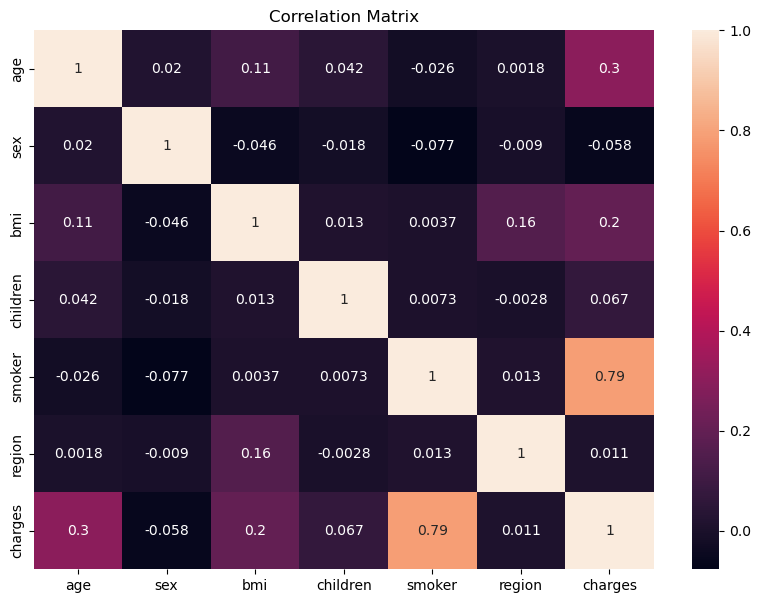

In [22]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

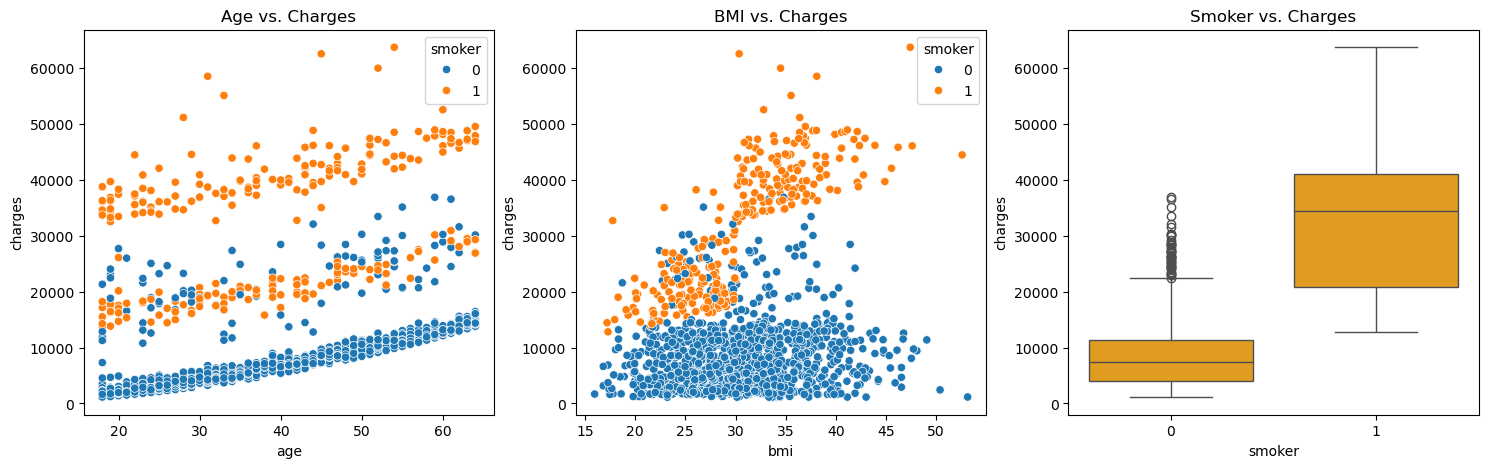

In [23]:
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x='age', y='charges', hue='smoker')
plt.title('Age vs. Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(data=data, x='bmi', y='charges', color='green', hue='smoker')
plt.title('BMI vs. Charges')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, x='smoker', y='charges', color='orange')
plt.title('Smoker vs. Charges')
plt.show()

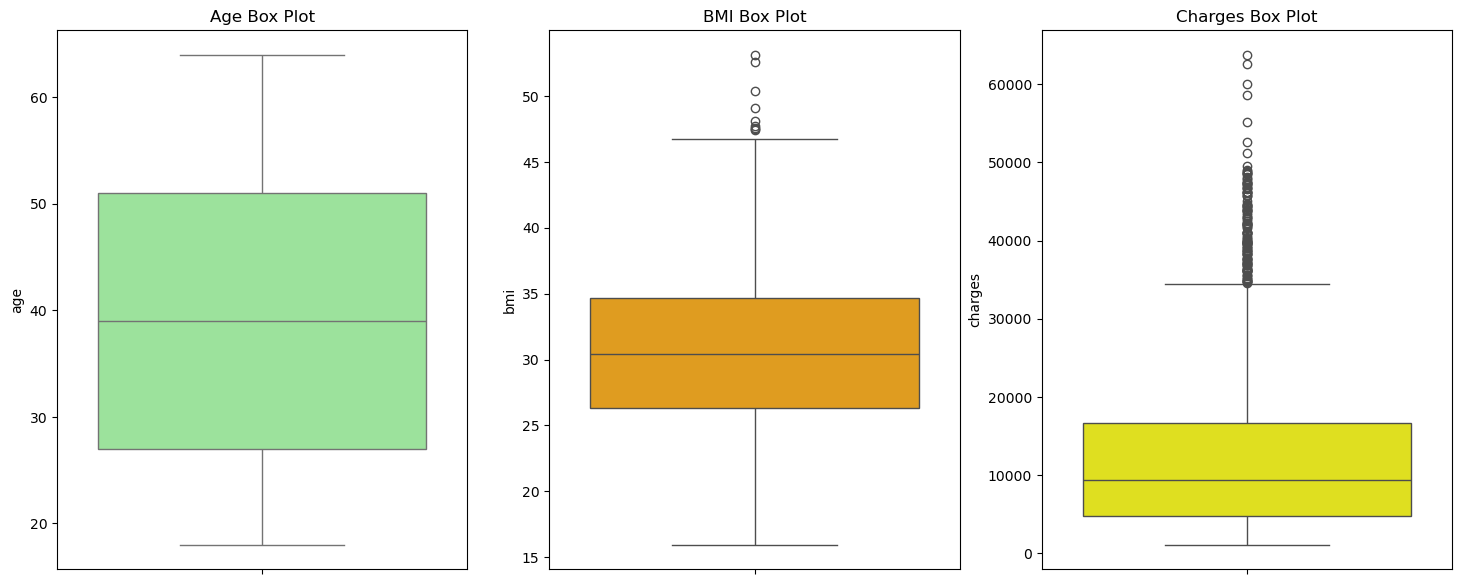

In [24]:
plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='age', color='lightgreen')
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='bmi', color='orange')
plt.title('BMI Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, y='charges', color='yellow')
plt.title('Charges Box Plot')
plt.show()

#### Linear Regression and model Evaluation(Mean Squared Error, Root Mean Squared Error, r2_sccore, mean absolute error)

In [27]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = model.predict(X_test)

In [29]:
model_r2_score = r2_score(y_test, y_pred)
model_mse = mean_squared_error(y_test, y_pred)
model_rmse = mean_squared_error(y_test, y_pred, squared=False)
model_mae = mean_absolute_error(y_test, y_pred)

In [30]:
print(f"The r2_score Error using Linear Regression : {model_r2_score:.2f}")
print(f"The MSE using Linear Regression : {model_mse:.2f}")
print(f"The RMSE using Linear Regression : {model_rmse:.2f}")
print(f"The MAE Error using Linear Regression : {model_mae:.2f}")

The r2_score Error using Linear Regression : 0.75
The MSE using Linear Regression : 37043999.46
The RMSE using Linear Regression : 6086.38
The MAE Error using Linear Regression : 4117.93


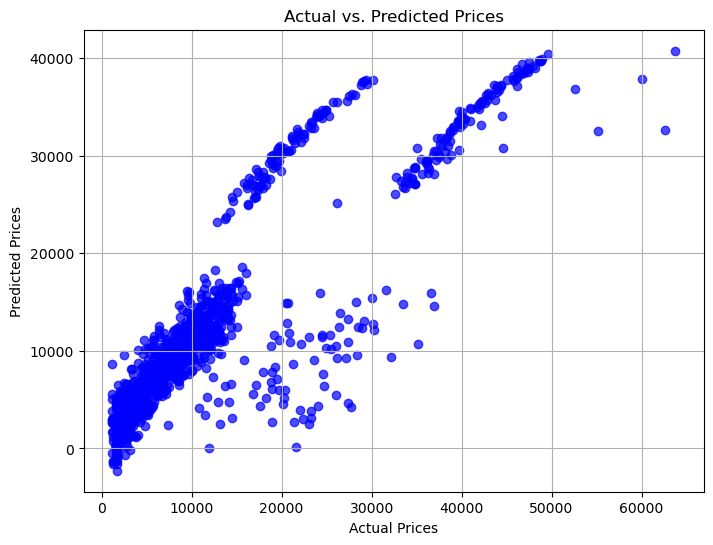

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()

#### Decision Tree and model Evaluation(Mean Squared Error, Root Mean Squared Error, r2_sccore, mean absolute error) 


In [34]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
y_pred = dtr.predict(X_test)

In [36]:
dtr_r2_score = r2_score(y_test, y_pred)
dtr_mse = mean_squared_error(y_test, y_pred)
dtr_rmse = mean_squared_error(y_test, y_pred, squared=False)
dtr_mae = mean_absolute_error(y_test, y_pred)

In [37]:
print(f"The r2_score Error using Decision Tree Regressor : {dtr_r2_score:.2f}")
print(f"The MSE using Decision Tree Regressor : {dtr_mse:.2f}")
print(f"The RMSE using Decision Tree Regressor : {dtr_rmse:.2f}")
print(f"The MAE Error using Decision Tree Regressor : {dtr_mae:.2f}")

The r2_score Error using Decision Tree Regressor : 0.74
The MSE using Decision Tree Regressor : 38685925.31
The RMSE using Decision Tree Regressor : 6219.80
The MAE Error using Decision Tree Regressor : 3169.34


In [38]:
k = 5
dtr_cv_scores = cross_val_score(dtr, X, y, cv=k).mean()
print(f"CV Score (K={k}): {dtr_cv_scores}")

CV Score (K=5): 0.7149418363707438


In [39]:
param_grid_dtr = {
    'max_depth': [3, 5, 10, None], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'], 
}

In [40]:
grid_search_dtr = GridSearchCV( estimator=dtr, param_grid=param_grid_dtr, scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_search_dtr.fit(X_train, y_train)
best_dtr = grid_search_dtr.best_estimator_

Fitting 5 folds for each of 108 candidates, totalling 540 fits


In [41]:
y_pred_dtr = best_dtr.predict(X_test)
dtr_r2 = r2_score(y_test, y_pred_dtr)
print("\nDecision Tree Regressor Grid Search Results:")
print(f"Best Hyperparameters for DTR: {grid_search_dtr.best_params_}")
print(f"R2 Score on Test Set (DTR): {dtr_r2:.2f}")


Decision Tree Regressor Grid Search Results:
Best Hyperparameters for DTR: {'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
R2 Score on Test Set (DTR): 0.85


#### Random Forest Regressor and model Evaluation(Mean Squared Error, Root Mean Squared Error, r2_sccore, mean absolute error)


In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
y_pred = rf.predict(X_test)

In [46]:
rf_r2_score = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred, squared=False)
rf_mae = mean_absolute_error(y_test, y_pred)

In [47]:
print(f"The r2_score Error using Random Forest Regressor : {rf_r2_score:.2f}")
print(f"The MSE using Random Forest Regressor : {rf_mse:.2f}")
print(f"The RMSE using Random Forest Regressor : {rf_rmse:.2f}")
print(f"The MAE Error using Random Forest Regressor : {rf_mae:.2f}")

The r2_score Error using Random Forest Regressor : 0.83
The MSE using Random Forest Regressor : 24772899.88
The RMSE using Random Forest Regressor : 4977.24
The MAE Error using Random Forest Regressor : 2767.22


In [48]:
k = 5
rf_cv_scores = cross_val_score(rf, X, y, cv=k).mean()
print(f"CV Score (K={k}): {rf_cv_scores}")

CV Score (K=5): 0.8363084945977217


In [49]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [50]:
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, scoring='r2', cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

In [51]:
y_pred_rf = best_rf.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
print("\nRandom Forest Grid Search Results:")
print(f"Best Hyperparameters for RF: {rf_grid_search.best_params_}")
print(f"R2 Score on Test Set (RF): {rf_r2:.2f}")


Random Forest Grid Search Results:
Best Hyperparameters for RF: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
R2 Score on Test Set (RF): 0.84


#### Gradient Boosting Regressor and model Evaluation(Mean Squared Error, Root Mean Squared Error, r2_sccore, mean absolute error)


In [53]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [54]:
y_pred = gbr.predict(X_test)

In [55]:
gbr_r2_score = r2_score(y_test, y_pred)
gbr_mse = mean_squared_error(y_test, y_pred)
gbr_rmse = mean_squared_error(y_test, y_pred, squared=False)
gbr_mae = mean_absolute_error(y_test, y_pred) 

In [56]:
print(f"The r2_score Error using Gradient Boosting Regressor : {gbr_r2_score:.2f}")
print(f"The MSE using Gradient Boosting Regressor : {gbr_mse:.2f}")
print(f"The RMSE using Gradient Boosting Regressor : {gbr_rmse:.2f}")
print(f"The MAE Error using Gradient Boosting Regressor : {gbr_mae:.2f}")

The r2_score Error using Gradient Boosting Regressor : 0.83
The MSE using Gradient Boosting Regressor : 25730396.67
The RMSE using Gradient Boosting Regressor : 5072.51
The MAE Error using Gradient Boosting Regressor : 2804.03


In [57]:
k = 5
gbr_cv_scores = cross_val_score(gbr, X, y, cv=k).mean()
print(f"CV Score (K={k}): {gbr_cv_scores}")

CV Score (K=5): 0.8553968956547997


In [58]:
param_grid_gbr = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5],  
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4], 
}

In [59]:
grid_search_gbr = GridSearchCV( estimator=gbr, param_grid=param_grid_gbr, scoring='r2', cv=5, n_jobs=-1, verbose=1)
grid_search_gbr.fit(X_train, y_train)
best_gbr = grid_search_gbr.best_estimator_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [60]:
y_pred_gbr = best_gbr.predict(X_test)
gbr_r2 = r2_score(y_test, y_pred_gbr)
print("\nGradient Boosting Regressor Grid Search Results:")
print(f"Best Hyperparameters for GBR: {grid_search_gbr.best_params_}")
print(f"R2 Score on Test Set (GBR): {gbr_r2:.2f}")


Gradient Boosting Regressor Grid Search Results:
Best Hyperparameters for GBR: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
R2 Score on Test Set (GBR): 0.85


#### Support Vector Machine (SVM) and model Evaluation(Mean Squared Error, Root Mean Squared Error, r2_sccore, mean absolute error)


In [63]:
svr = SVR(kernel='linear', C=1)
svr.fit(X_train, y_train)

SVR(C=1, kernel='linear')

In [64]:
y_pred = svr.predict(X_test)

In [65]:
svr_r2_score = r2_score(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = mean_squared_error(y_test, y_pred, squared=False)
svr_mae = mean_absolute_error(y_test, y_pred)

In [66]:
print(f"The r2_score Error using Support Vector Machine: {svr_r2_score:.2f}")
print(f"The MSE using Support Vector Machine: {svr_mse:.2f}")
print(f"The RMSE using Support Vector Machine: {svr_rmse:.2f}")
print(f"The MAE Error using Support Vector Machine : {svr_mae:.2f}")

The r2_score Error using Support Vector Machine: -0.10
The MSE using Support Vector Machine: 162463199.89
The RMSE using Support Vector Machine: 12746.11
The MAE Error using Support Vector Machine : 8263.24


In [67]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

In [68]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

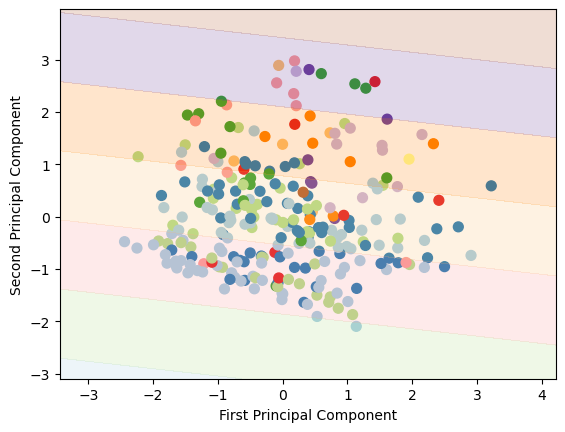

In [69]:
# Plot the training data
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.Paired, s=50, label="Training Data")
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Plot the decision boundary
h = .02
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svr.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)

In [70]:
k = 5
svr_cv_scores = cross_val_score(svr, X, y, cv=k).mean()
print(f"CV Score (K={k}): {svr_cv_scores}")

CV Score (K=5): -0.13575288144762165


In [71]:
param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly']
}

In [72]:
svr_grid_search = GridSearchCV(SVR(), param_grid_svr, scoring='r2', cv=5)
svr_grid_search.fit(X_train, y_train)
best_svr = svr_grid_search.best_estimator_

In [73]:
y_pred_svr = best_svr.predict(X_test)
svr_r2 = r2_score(y_test, y_pred_svr)
print("\nSVR Grid Search Results:")
print(f"Best Hyperparameters for SVR: {svr_grid_search.best_params_}")
print(f"R2 Score on Test Set (SVR): {svr_r2:.2f}")


SVR Grid Search Results:
Best Hyperparameters for SVR: {'C': 10, 'epsilon': 0.1, 'kernel': 'linear'}
R2 Score on Test Set (SVR): 0.08


In [75]:
metric_results= {'Model': ['Linear Regression','Decision Tree','Random Forest','Gradient Boosting', 'Support Vector Machine'], 
                 'R2 Square': [model_r2_score, dtr_r2_score, rf_r2_score, gbr_r2_score, svr_r2_score],
                  'Grid Search R2':[0, 0, rf_r2, gbr_r2, svr_r2],
                 'CV':[0, dtr_cv_scores, rf_cv_scores, gbr_cv_scores, svr_cv_scores],
                  'MSE':[model_mse, dtr_mse, rf_mse, gbr_mse, svr_mse],
                  'RMSE':[model_rmse, dtr_rmse, rf_rmse, gbr_rmse, svr_rmse],
                  'MAE':[model_mae, dtr_mae, rf_mae, gbr_mae, svr_mae]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R2 Square,Grid Search R2,CV,MSE,RMSE,MAE
0,Linear Regression,0.749001,0.000000,0.000000,3.704400e+07,6086.378189,4117.929221
1,Decision Tree,0.737876,0.000000,0.714942,3.868593e+07,6219.801067,3169.343009
2,Random Forest,0.832147,0.842354,0.836308,2.477290e+07,4977.238178,2767.217878
3,Gradient Boosting,0.825659,0.852595,0.855397,2.573040e+07,5072.513842,2804.025248
4,Support Vector Machine,-0.100800,0.080467,-0.135753,1.624632e+08,12746.105283,8263.243965
